In [94]:
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('/content/NSE-TATAGLOBAL11[1].csv')

In [34]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [35]:
data['Date']=pd.to_datetime(data.Date)

In [36]:
data.shape

(1235, 8)

In [37]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [38]:
data.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 77.3 KB


In [40]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [41]:
print(len(data))

1235


<Axes: >

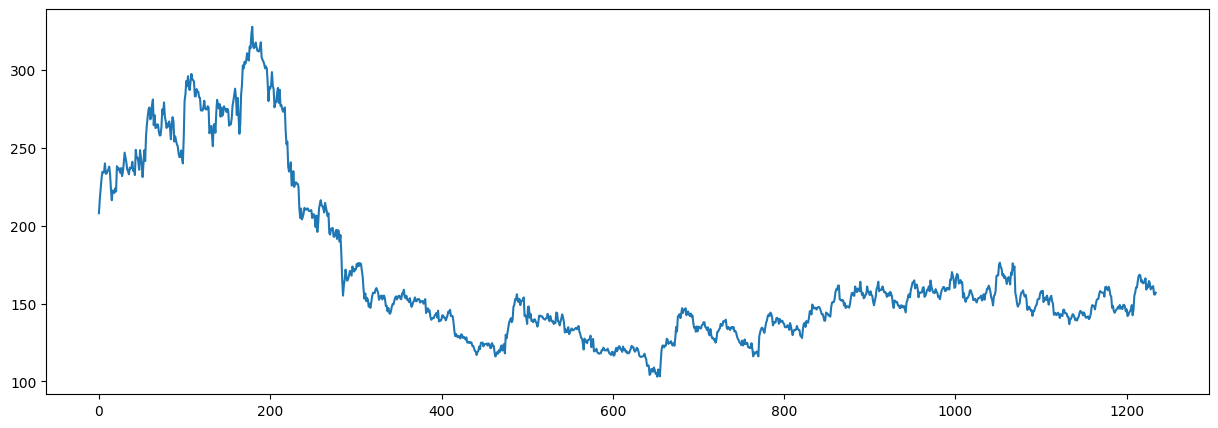

In [42]:
data['Open'].plot(figsize=(15,5))

In [47]:
x=data[['Open','High','Low','Last']]
y=data['Close']

In [49]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test=train_test_split(x,y,random_state=0)

In [51]:
x_train.shape

(926, 4)

In [53]:
x_test.shape

(309, 4)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor=LinearRegression()

In [65]:
regressor.fit(x_train,y_train)

LinearRegression()

In [62]:
print(regressor.coef_)

[-0.06299618  0.09073469  0.08672877  0.88451674]


In [64]:
print(regressor.intercept_)

0.1401341854183329


In [68]:
predicted=regressor.predict(x_test)

In [70]:
print(x_test)

        Open    High     Low    Last
1083  152.95  154.85  151.05  153.35
18    221.00  224.50  219.10  223.15
1099  156.50  157.00  151.85  153.00
818   132.95  133.90  132.30  133.20
184   314.65  319.20  312.20  317.45
...      ...     ...     ...     ...
907   154.40  154.70  151.55  153.00
801   134.90  137.80  134.25  136.80
1089  145.80  146.70  144.15  144.65
435   125.00  126.05  123.80  124.10
833   149.40  150.30  143.00  144.60

[309 rows x 4 columns]


In [72]:
predicted.shape

(309,)

In [74]:
dframe=pd.DataFrame({'Actual Price':y_test,'PredictedPrice':predicted})

In [76]:
print(dframe)

      Actual Price  PredictedPrice
1083        153.45      153.296158
18          222.95      222.970100
1099        152.95      153.027403
818         132.60      133.206013
184         317.60      317.147460
...            ...             ...
907         152.40      152.924987
801         136.80      136.790417
1089        144.55      144.713369
435         124.45      124.208268
833         144.90      144.669263

[309 rows x 2 columns]


In [78]:
dframe.head(25)

,Actual Price,PredictedPrice
1083,153.45,153.296158
18,222.95,222.970100
1099,152.95,153.027403
818,132.60,133.206013
184,317.60,317.147460
608,122.40,122.511089
1213,160.35,161.661581
717,128.00,127.727919
1137,141.20,141.178114
1009,162.20,163.373307


In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
regressor.score(x_test,y_test)

0.9999281448580609

In [84]:
import math

In [88]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.29103838136150123


In [89]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 0.1608032139897181


In [90]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.4010027605761812


In [91]:
graph=dframe.head(20)

<Axes: >

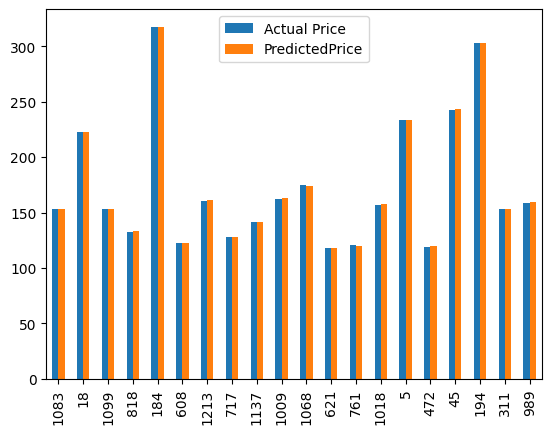

In [95]:
graph.plot(kind='bar')

In [99]:
#Calculate the daily returns
returns=data['Close'].pct_change()
returns

0            NaN
1      -0.027655
2       0.043021
3       0.043080
4       0.014499
          ...   
1230    0.008858
1231    0.003763
1232    0.000625
1233   -0.028723
1234    0.001607
Name: Close, Length: 1235, dtype: float64

In [101]:
#Calculate the moving averages
ma_10=data['Close'].rolling(window=10).mean()
ma_50=data['Close'].rolling(window=50).mean()
ma_10
ma_50

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1230    153.301
1231    153.357
1232    153.466
1233    153.515
1234    153.681
Name: Close, Length: 1235, dtype: float64

In [102]:
#Calculate the standard deviation
std=data['Close'].rolling(window=10).std()
std

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1230    2.558586
1231    2.535553
1232    2.392053
1233    2.373587
1234    2.701975
Name: Close, Length: 1235, dtype: float64